In [ ]:
#importing libraries
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
image_height = 100
image_width = 100

dataset_path = os.path.join(os.getcwd(), "Dataset", "Faces")

In [ ]:
# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        if os.path.isfile(filepath):  # Ensure it's a file
            try:
                label = filename.split('_')[0]  # Extract NAME as label
                img = cv2.imread(filepath)
                if img is not None:
                    img = cv2.resize(img, (image_width, image_height))  # Resize images
                    images.append(img)
                    labels.append(label)
            except Exception as e:
                print(f"Skipping file: {filename} due to error: {e}")  # Skip if any error occurs

    return np.array(images), np.array(labels)

In [ ]:
images, labels = load_images_from_folder(dataset_path)

In [ ]:
# Convert labels (names) into numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(set(labels))  # Number of unique people

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer
])

C:\Users\AI_LAB\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.0443 - loss: 3.4259 - val_accuracy: 0.0468 - val_loss: 3.3883
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.0817 - loss: 3.3130 - val_accuracy: 0.1813 - val_loss: 2.9400
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.2345 - loss: 2.6977 - val_accuracy: 0.2378 - val_loss: 2.7247
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.3443 - loss: 2.2320 - val_accuracy: 0.4094 - val_loss: 2.0783
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4515 - loss: 1.8451 - val_accuracy: 0.4542 - val_loss: 1.8936
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5512 - loss: 1.4538 - val_accuracy: 0.4756 - val_loss: 1.7702
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6159 - loss: 1.2208 - val_accuracy: 0.5185 - val_loss: 1.8256
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6529 - loss: 1.0823 - val_accuracy: 0.5634 - v

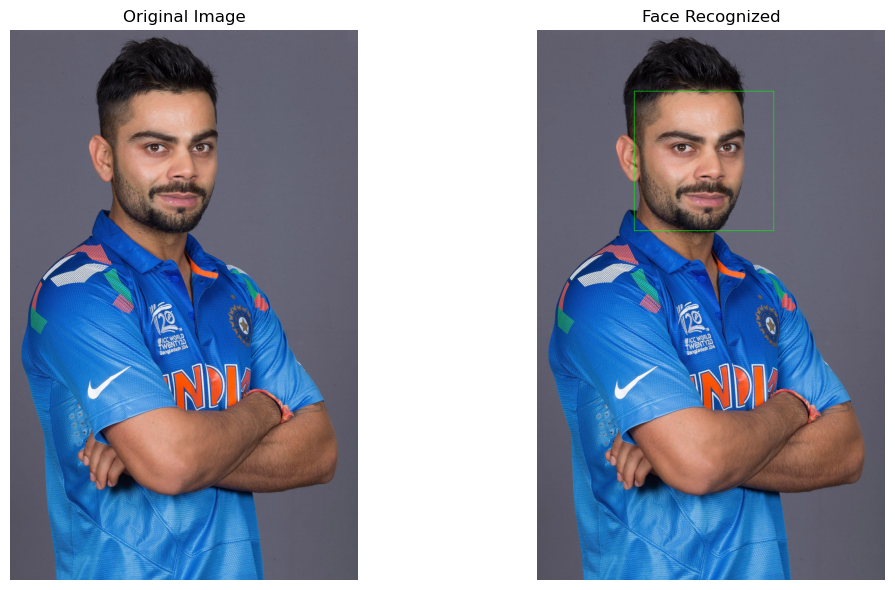

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load pre-trained face detection model from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load your image
image_path = 'sample1.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale (required for face detection)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangle(s) around detected faces
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert images to RGB for displaying in matplotlib (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Display the images side by side using subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image
axes[0].imshow(original_image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show the image with the face rectangle
axes[1].imshow(image_rgb)
axes[1].set_title("Face Recognized")
axes[1].axis('off')

# Display the side-by-side images
plt.tight_layout()
plt.show()

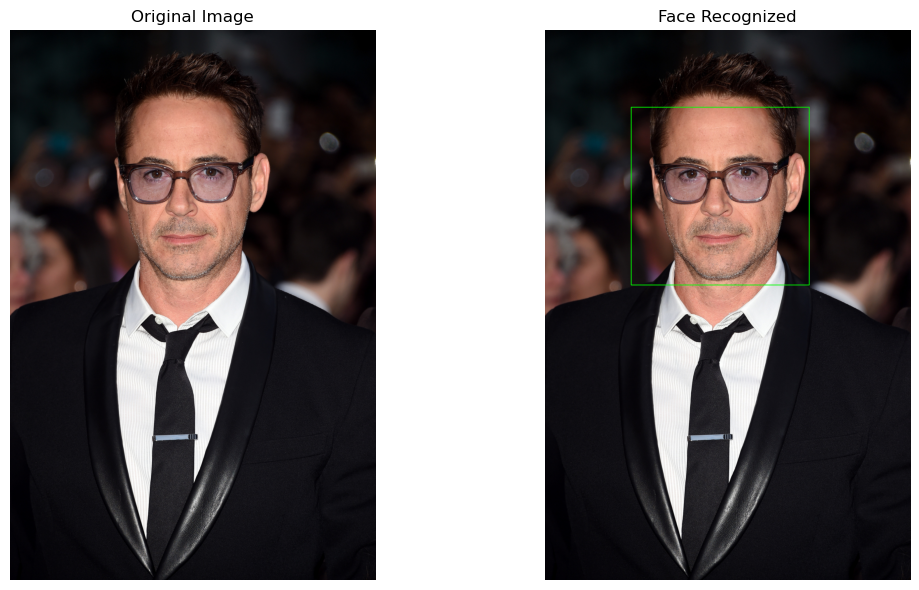

In [ ]:
# Load your image
image_path = 'sample2.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale (required for face detection)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangle(s) around detected faces
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert images to RGB for displaying in matplotlib (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Display the images side by side using subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image
axes[0].imshow(original_image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show the image with the face rectangle
axes[1].imshow(image_rgb)
axes[1].set_title("Face Recognized")
axes[1].axis('off')

# Display the side-by-side images
plt.tight_layout()
plt.show()